Create Player Ratings

In [1]:
import sys
sys.path.append("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from player_ratings import *

import os
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [3]:
import matplotlib.font_manager as fm

font_path = "/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/viz/fonts"
for x in os.listdir(font_path):
    if x != ".DS_Store":
        for y in os.listdir(f"{font_path}/{x}"):
            if y.split(".")[-1] == "ttf":
                fm.fontManager.addfont(f"{font_path}/{x}/{y}")
                try:
                    fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
                except Exception:
                    continue
plt.style.use("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/viz/mplstyle/dark_theme.mplstyle")

In [4]:
player_stats = pd.read_csv("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/data/player_stats.csv")
player_stats['Season'] = player_stats['Match_ID'].apply(lambda x: int(x[:4]))
player_stats['Player_Season'] = player_stats['Player'] + "_" + player_stats['Season'].astype(str)

player_stats['Score'] = player_stats['Behinds'] + player_stats['Goals']*6
player_stats['xScore_Diff'] = player_stats['Score'] - player_stats['xScore']

player_stats.head()

,Match_ID,Team,Player,Round_ID,AFL_API_Player_ID,Player_Type,playerId,Age,Height,Weight,Number,Kicking_Foot,State_Of_Origin,Draft_Year,Debut_Year,Recruited_From,Draft_Position,Draft_Type,Photo_URL,Date_Of_Birth,Percent_Played,Behinds,Bounces,Centre_Bounces_Attended,Centre_Clearances,Clangers,Defensive_Contest_Losses,Defensive_Contest_Loss_Percentage,Defensive_One_On_One_Contests,Contested_Marks,Contested_Possession_Rate,Contested_Possessions,Offensive_One_On_One_Contests,Offensive_Contest_Wins,Offensive_Contest_Win_Percentage,Defensive_Half_Pressure_Acts,Disposal_Efficiency,Disposals,AFL_Fantasy_Points,Effective_Disposals,Effective_Kicks,Inside_50_Ground_Ball_Gets,Frees_Against,Frees_For,Goal_Accuracy,Goal_Assists,Goals,Ground_Ball_Gets,Handballs,Hit_Outs,Hit_Outs_To_Advantage,Hit_Outs_To_Advantage_Rate,Hit_Out_Win_Percentage,Inside_50s,Intercept_Marks,Intercepts,Kick_Efficiency,Kick_Ins,Kick_Ins_Played_On,Kicks,Kick_To_Handball_Ratio,Marks,Marks_Inside_50,Marks_On_Lead,Metres_Gained,One_Percenters,Pressure_Acts,Player_Rating_Points,Rebound_50s,Ruck_Contests,Score_Involvements,Score_Launches,Shots_At_Goal,Spoils,Stoppage_Clearances,Tackles,Tackles_Inside_50,Clearances,Possessions,Turnovers,Uncontested_Possessions,AFLCA_Player_ID,Coaches_Votes,Position,Team_Status,Position_Sub_Group,Position_Group,Year,Brownlow_Votes,Season,xScore,xT_created,xT_denied,vaep_value,offensive_value,defensive_value,exp_vaep_value,exp_offensive_value,exp_defensive_value,xT_received,xT_prevented,vaep_value_received,exp_vaep_value_received,Player_Season,Score,xScore_Diff
0,202101_BrisbaneLions_Sydney,Brisbane Lions,Brandon Starcevich,202101,Brandon_Starcevich,MEDIUM_DEFENDER,CD_I1002401,22,187,92,37,RIGHT,WA,2017.0,2018.0,Mt Lawley-Inglewood (WA)/Trinity Coll (WA)/Eas...,18.0,nationalDraft,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1999-07-24,84,0,1.0,0.0,0,1,1.0,100.0,1.0,1,55.6,5,0.0,0.0,0.0,4.0,88.9,9,31,8.0,5.0,0.0,0,1,0.0,0,0,3.0,3,0,0.0,0.0,0.0,0,1.0,4,83.3,0.0,0.0,6,2.0,2,0,1.0,172.0,1,5.0,6.1,2,0.0,4,1.0,0,1.0,1,0,0,1,9,2,4,NaN,NaN,Half Back Flank Left,FINAL_TEAM,Half-Back,Back,2021.0,0.0,2021,0.000000,-0.235667,0.000000,0.711460,0.026457,0.685004,3.362637,0.585132,2.777505,-0.461340,0.190552,0.329877,2.328707,Brandon Starcevich_2021,0,0.000000
1,202101_BrisbaneLions_Sydney,Brisbane Lions,Callum Ah Chee,202101,Callum_Ah_Chee,MEDIUM_DEFENDER,CD_I298437,24,183,79,4,RIGHT,WA,2015.0,2016.0,Kelmscott (WA)/South Fremantle (WAFL)/Gold Coast,8.0,nationalDraft,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1997-10-09,87,0,0.0,0.0,0,4,1.0,100.0,1.0,0,66.7,8,0.0,0.0,0.0,5.0,83.3,12,36,10.0,5.0,0.0,2,0,0.0,1,0,8.0,6,0,0.0,0.0,0.0,2,0.0,7,83.3,1.0,1.0,6,1.0,0,0,0.0,258.0,2,7.0,8.0,1,0.0,2,1.0,0,2.0,0,3,1,0,12,6,4,NaN,NaN,Interchange,FINAL_TEAM,Interchange,Interchange,2021.0,0.0,2021,0.000000,-0.075963,0.010892,0.291451,0.479986,-0.188535,1.318957,1.031427,0.287530,-0.487945,-0.039690,0.608221,3.269039,Callum Ah Chee_2021,0,0.000000
2,202101_BrisbaneLions_Sydney,Brisbane Lions,Charlie Cameron,202101,Charlie_Cameron,MEDIUM_FORWARD,CD_I990609,27,180,75,23,RIGHT,WA,2014.0,2014.0,Newman Saints (WA)/Swan Districts (WAFL)/Adelaide,NaN,rookieElevation,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1994-07-05,77,0,0.0,9.0,3,0,0.0,0.0,0.0,0,50.0,5,0.0,0.0,0.0,3.0,70.0,10,39,7.0,4.0,0.0,0,2,0.0,1,0,1.0,3,0,0.0,0.0,0.0,3,0.0,1,57.1,0.0,0.0,7,2.3,2,1,2.0,207.0,1,9.0,10.1,0,0.0,4,1.0,0,0.0,0,1,0,3,10,0,5,NaN,NaN,Forward Pocket Right,FINAL_TEAM,Forward-Pocket,Forward,2021.0,0.0,2021,0.000000,0.460322,-0.166355,0.696752,0.681301,0.015451,6.034727,5.882581,0.152147,0.197894,-0.035491,0.859897,8.186274,Charlie Cameron_2021,0,0.000000
3,202101_BrisbaneLions_Sydney,Brisbane Lions,Daniel Rich,202101,Daniel_Rich,MEDIUM_DEFENDER,CD_I271072,31,183,95,10,LEFT,WA,2008.0,2009.0,Sorrento-Duncraig (WA)/Subiaco (WAFL),7.0,nationalDraft,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1990-06-07,84,0,0.0,0.0,0,4,1.0,50.0,2.0,0,12.5,2,0.0,0.0,0.0,5.0,60.9,23,95,14.0,12.0,0.0

In [5]:
player_stats[['Position_Group', 'Position_Sub_Group']].value_counts().sort_index()

Position_Group  Position_Sub_Group
Back            Back-Pocket           2249
                Half-Back             2231
                Key-Back              2246
Forward         Forward-Pocket        2233
                Half-Forward          2208
                Key-Forward           2247
Interchange     Interchange           5463
Midfield        Centre                3354
                Wing                  2191
Ruck            Ruck                  1148
dtype: int64

In [7]:
SELECTED_POSITION = "Midfield"

position_role_stats = {
    'ball_progression' : [
        'Effective_Disposals',
        'Effective_Kicks',
        'Inside_50s',
        'Metres_Gained',
        'xT_created',
        'vaep_value',
        'offensive_value',
        'exp_vaep_value',
        'exp_offensive_value',
    ],
    'ball_denial' : [
        'Rebound_50s',
        'xT_prevented',
        'defensive_value',
        'exp_defensive_value'
    ],
    'contest' : [
        'Centre_Clearances',
        'Contested_Marks',
        'Contested_Possessions',
        'Ground_Ball_Gets',
        'Intercepts',
        'Pressure_Acts',
        'Stoppage_Clearances',
        'Tackles',
        'Clearances',
        'Possessions',
        'Uncontested_Possessions'
    ]}

In [8]:
position_summary, position_role_stats_zscaled = create_position_summary(player_stats, SELECTED_POSITION, position_role_stats)
selected_position_rating = get_selected_position_rating(SELECTED_POSITION)
position_summary.sort_values(by=selected_position_rating, ascending=False).head(10)

,,,Games,Age,Height,Weight,Debut_Year,Draft_Position,defensive_value_sum,Clearances_sum,Effective_Disposals_sum,exp_vaep_value_sum,Contested_Possessions_sum,Centre_Clearances_sum,xT_prevented_sum,Intercepts_sum,Possessions_sum,Tackles_sum,vaep_value_sum,Contested_Marks_sum,Metres_Gained_sum,Effective_Kicks_sum,offensive_value_sum,exp_defensive_value_sum,xT_created_sum,Pressure_Acts_sum,Uncontested_Possessions_sum,Rebound_50s_sum,Inside_50s_sum,Stoppage_Clearances_sum,Ground_Ball_Gets_sum,exp_offensive_value_sum,Percent_Played_sum,defensive_value_pergame,defensive_value_per100,Clearances_pergame,Clearances_per100,Effective_Disposals_pergame,Effective_Disposals_per100,exp_vaep_value_pergame,exp_vaep_value_per100,Contested_Possessions_pergame,Contested_Possessions_per100,Centre_Clearances_pergame,Centre_Clearances_per100,xT_prevented_pergame,xT_prevented_per100,Intercepts_pergame,Intercepts_per100,Possessions_pergame,Possessions_per100,Tackles_pergame,Tackles_per100,vaep_value_pergame,vaep_value_per100,Contested_Marks_pergame,Contested_Marks_per100,Metres_Gained_pergame,Metres_Gained_per100,Effective_Kicks_pergame,Effective_Kicks_per100,offensive_value_pergame,offensive_value_per100,exp_defensive_value_pergame,exp_defensive_value_per100,xT_created_pergame,xT_created_per100,Pressure_Acts_pergame,Pressure_Acts_per100,Uncontested_Possessions_pergame,Uncontested_Possessions_per100,Rebound_50s_pergame,Rebound_50s_per100,Inside_50s_pergame,Inside_50s_per100,Stoppage_Clearances_pergame,Stoppage_Clearances_per100,Ground_Ball_Gets_pergame,Ground_Ball_Gets_per100,exp_offensive_value_pergame,exp_offensive_value_per100,defensive_value_per100_z,Clearances_per100_z,Effective_Disposals_per100_z,exp_vaep_value_per100_z,Contested_Possessions_per100_z,Centre_Clearances_per100_z,xT_prevented_per100_z,Intercepts_per100_z,Possessions_per100_z,Tackles_per100_z,vaep_value_per100_z,Contested_Marks_per100_z,Metres_Gained_per100_z,Effective_Kicks_per100_z,offensive_value_per100_z,exp_defensive_value_per100_z,xT_created_per100_z,Pressure_Acts_per100_z,Uncontested_Possessions_per100_z,Rebound_50s_per100_z,Inside_50s_per100_z,Stoppage_Clearances_per100_z,Ground_Ball_Gets_per100_z,exp_offensive_value_per100_z,ball_progression_rating,ball_denial_rating,contest_rating,midfield_rating
Player,Team,Season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adam Cerra,Carlton,2023,16,23.000000,188.0,87.0,2018.0,5.0,1.924827,70,322.0,160.770365,165,28,0.493392,59,439,76,22.096313,0,6191.0,140.0,20.171487,17.833458,5.796896,338.0,274,21,80,42,122.0,142.936906,1218,0.120302,0.158032,4.375000,5.747126,20.125000,26.436782,10.048148,13.199537,10.312500,13.546798,1.750000,2.298851,0.030837,0.040508,3.687500,4.844007,27.437500,36.042693,4.750000,6.239737,1.381020,1.814147,0.000000,0.000000,386.937500,508.292282,8.750000,11.494253,1.260718,1.656115,1.114591,1.464159,0.362306,0.475936,21.125000,27.750411,17.125000,22.495895,1.312500,1.724138,5.000000,6.568144,2.625000,3.448276,7.625000,10.016420,8.933557,11.735378,1.359576,0.254243,1.721163,1.905895,0.453889,0.261143,0.553116,1.179436,1.230315,0.573761,1.854327,-0.868107,0.865448,1.349550,1.533305,2.042868,1.781337,0.949480,1.482466,-0.476589,1.317789,0.227051,0.932783,1.510606,1.537713,0.869743,0.606951,1.004802
Zak Butters,Port Adelaide,2023,12,22.000000,181.0,77.0,2019.0,12.0,1.531032,57,223.0,124.641584,136,22,0.724832,52,321,41,20.257019,3,4848.0,97.0,18.725987,9.230970,2.360209,224.0,185,18,58,35,103.0,115.410614,954,0.127586,0.160486,4.750000,5.974843,18.583333,23.375262,10.386799,13.065156,11.333333,14.255765,1.833333,2.306080,0.060403,0.075978,4.333333,5.450734,26.750000,33.647799,3.416667,4.297694,1.688085,2.123377,0.250000,0.314465,404.000000,508.176101,8.083333,10.167715,1.560499,1.962892,0.769248,0.967607,0.196684,0.247401,18.666667,23.480084,15.416667,19.392034,1.500000,1.886792,4.833333,6.079665,2.916667,3.668763,8.583333,10.796646,9.617551,12.097549,1.390

In [9]:
players = create_player_rating_by_season(position_summary, SELECTED_POSITION, position_role_stats_zscaled)
players.sort_values(by='overall_'+selected_position_rating, ascending=False).head(20)

midfield_rating                      \
Season                                          2021      2022      2023   
Player              Team                                                   
Marcus Bontempelli  Western Bulldogs        0.435255  0.456978  0.975457   
Rory Laird          Adelaide                0.725741  0.910184  0.693255   
Zak Butters         Port Adelaide           0.000000 -0.111184  0.994463   
Luke Davies-Uniacke North Melbourne        -0.030910  0.730999  0.566825   
Tom Liberatore      Western Bulldogs        0.549351  0.000000  0.794350   
Adam Cerra          Carlton                 0.000000 -0.251330  1.004802   
Zach Merrett        Essendon                0.780172  0.551840  0.450116   
Caleb Serong        Fremantle              -0.126745  0.329945  0.692333   
Noah Anderson       Gold Coast              0.000000  0.417351  0.538758   
Errol Gulden        Sydney                  0.000000  0.000000  0.725833   
Jordan Dawson       Adelaide                0.000000  0.000000  0.689597   
Darcy Parish        Essendon                0.620171  0.214104  0.454200   
Jack Steele         St Kilda                0.609907  0.262746  0.389368   
Lachie Neale        Brisbane Lions          0.312119  0.270434  0.345422   
Ollie Wines         Port Adelaide           0.835584  0.413123  0.137322   
Clayton Oliver      Melbourne               0.634017  0.746739  0.000000   
Jack Macrae         Western Bulldogs        0.905317  0.624970  0.000000   
Chad Warner         Sydney                  0.000000  0.246138  0.315104   
Nick Blakey         Sydney                  0.000000  0.820987  0.000000   
Andrew Brayshaw     Fremantle               0.566008  0.466097  0.079245   

                                     overall_midfield_rating  
Season                                                        
Player              Team                                      
Marcus Bontempelli  Western Bulldogs                0.765893  
Rory Laird          Adelaide                        0.761583  
Zak Butters         Port Adelaide                   0.563323  
Luke Davies-Uniacke North Melbourne                 0.556304  
Tom Liberatore      Western Bulldogs                0.531545  
Adam Cerra          Carlton                         0.527482  
Zach Merrett        Essendon                        0.513639  
Caleb Serong        Fremantle                       0.501709  
Noah Anderson       Gold Coast                      0.448460  
Errol Gulden        Sydney                          0.435500  
Jordan Dawson       Adelaide                        0.413758  
Darcy Parish        Essendon                        0.398768  
Jack Steele         St Kilda                        0.373435  
Lachie Neale        Brisbane Lions                  0.319595  
Ollie Wines         Port Adelaide                   0.289888  
Clayton Oliver      Melbourne                       0.287423  
Jack Macrae         Western Bulldogs                0.278023  
Chad Warner         Sydney                          0.262904  
Nick Blakey         Sydney                          0.246296  
Andrew Brayshaw     Fremantle                       0.243977

Visualise

In [10]:
# display_histograms(position_summary, nrows=9, ncols=4, stats=position_stats_zscaled)

In [11]:
roles = list(position_role_stats_zscaled.keys())
role_ratings = [x+"_rating" for x in roles]
stats_list = []
for role in roles:
    stats_list.append([role+"_rating"] + position_role_stats_zscaled[role]) 

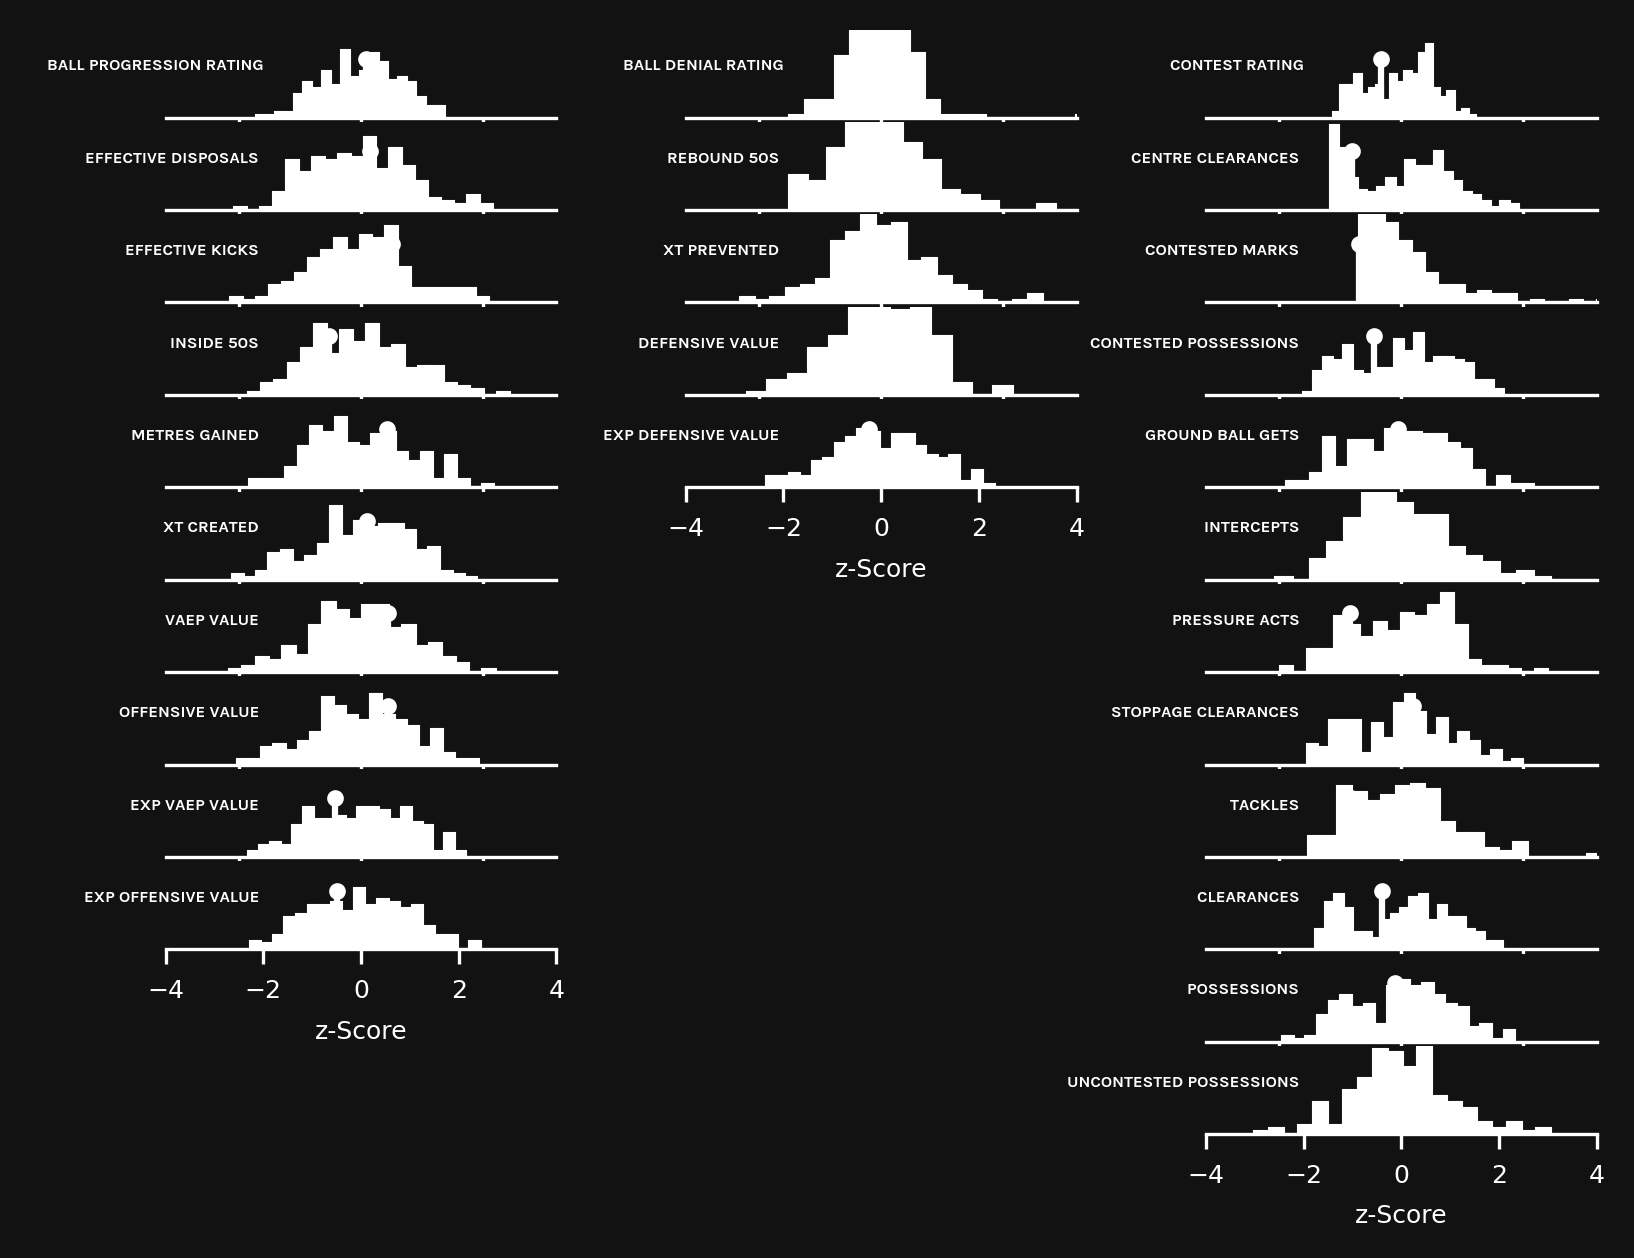

In [12]:
player = "Josh Daicos"
team = "Collingwood"
season = 2023

fig, axs = plot_multiple_role_histograms(position_summary, stats_list, player, team, season, xlim=4, ylim = 50)

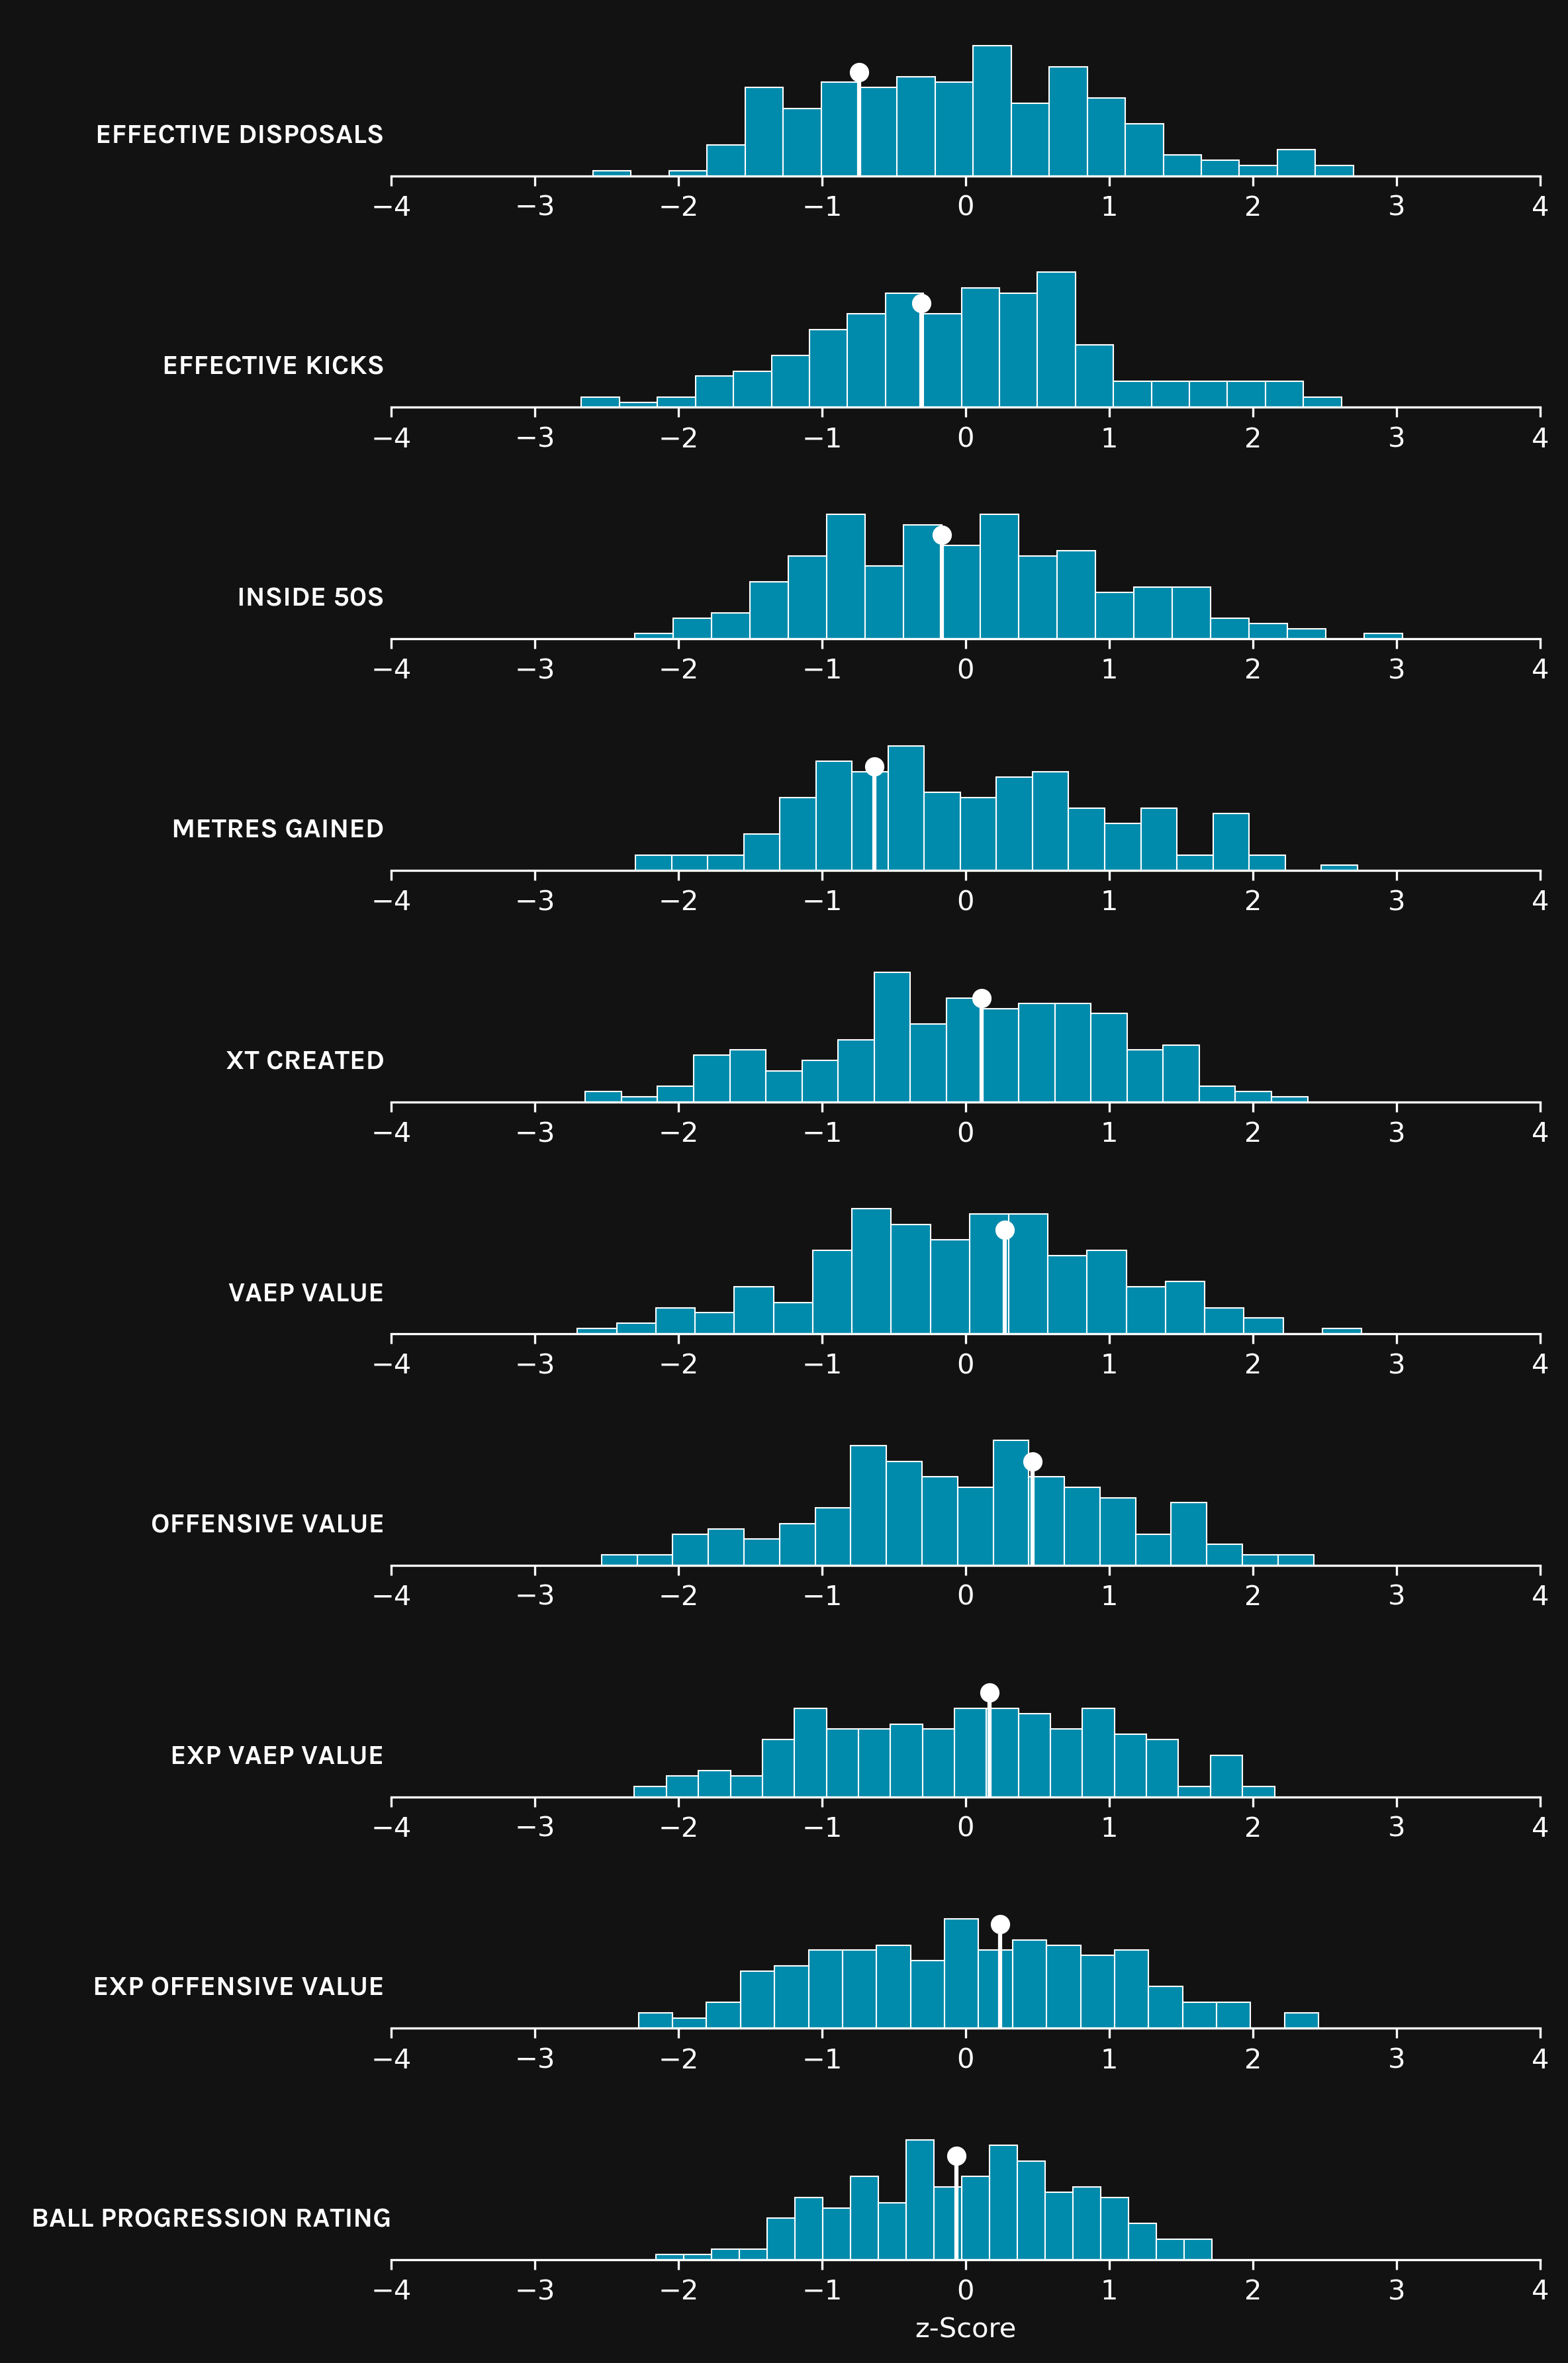

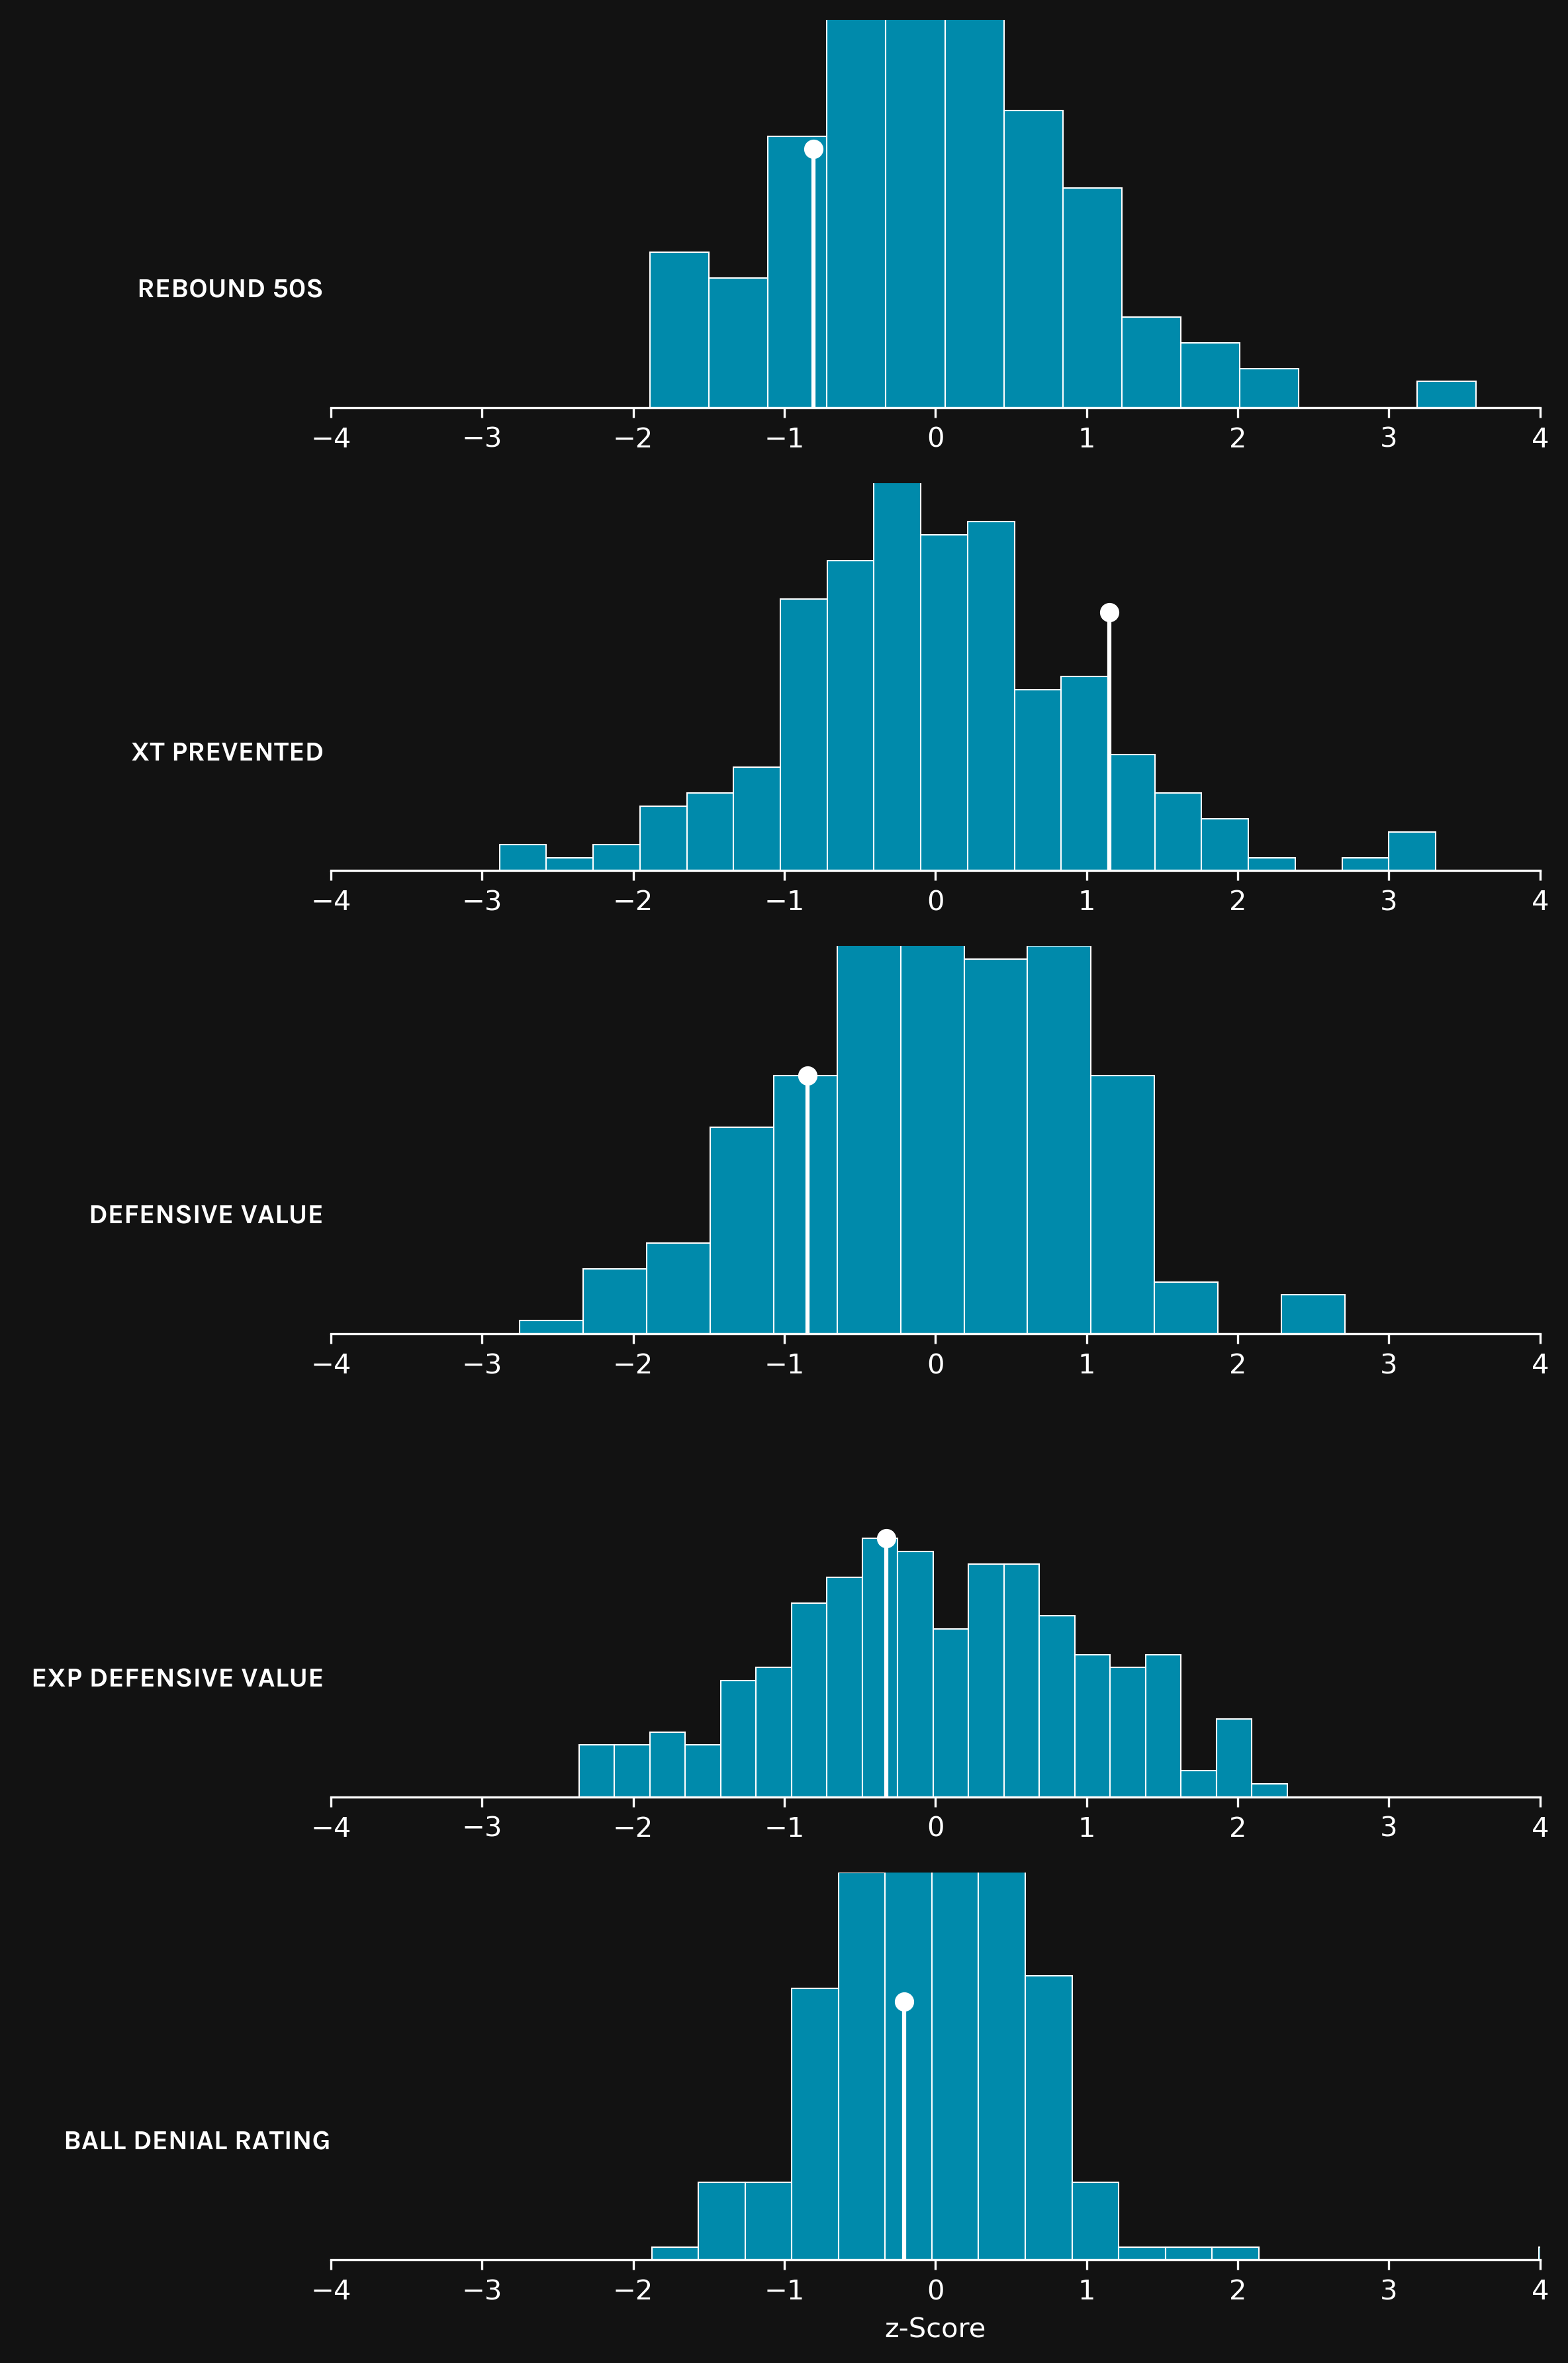

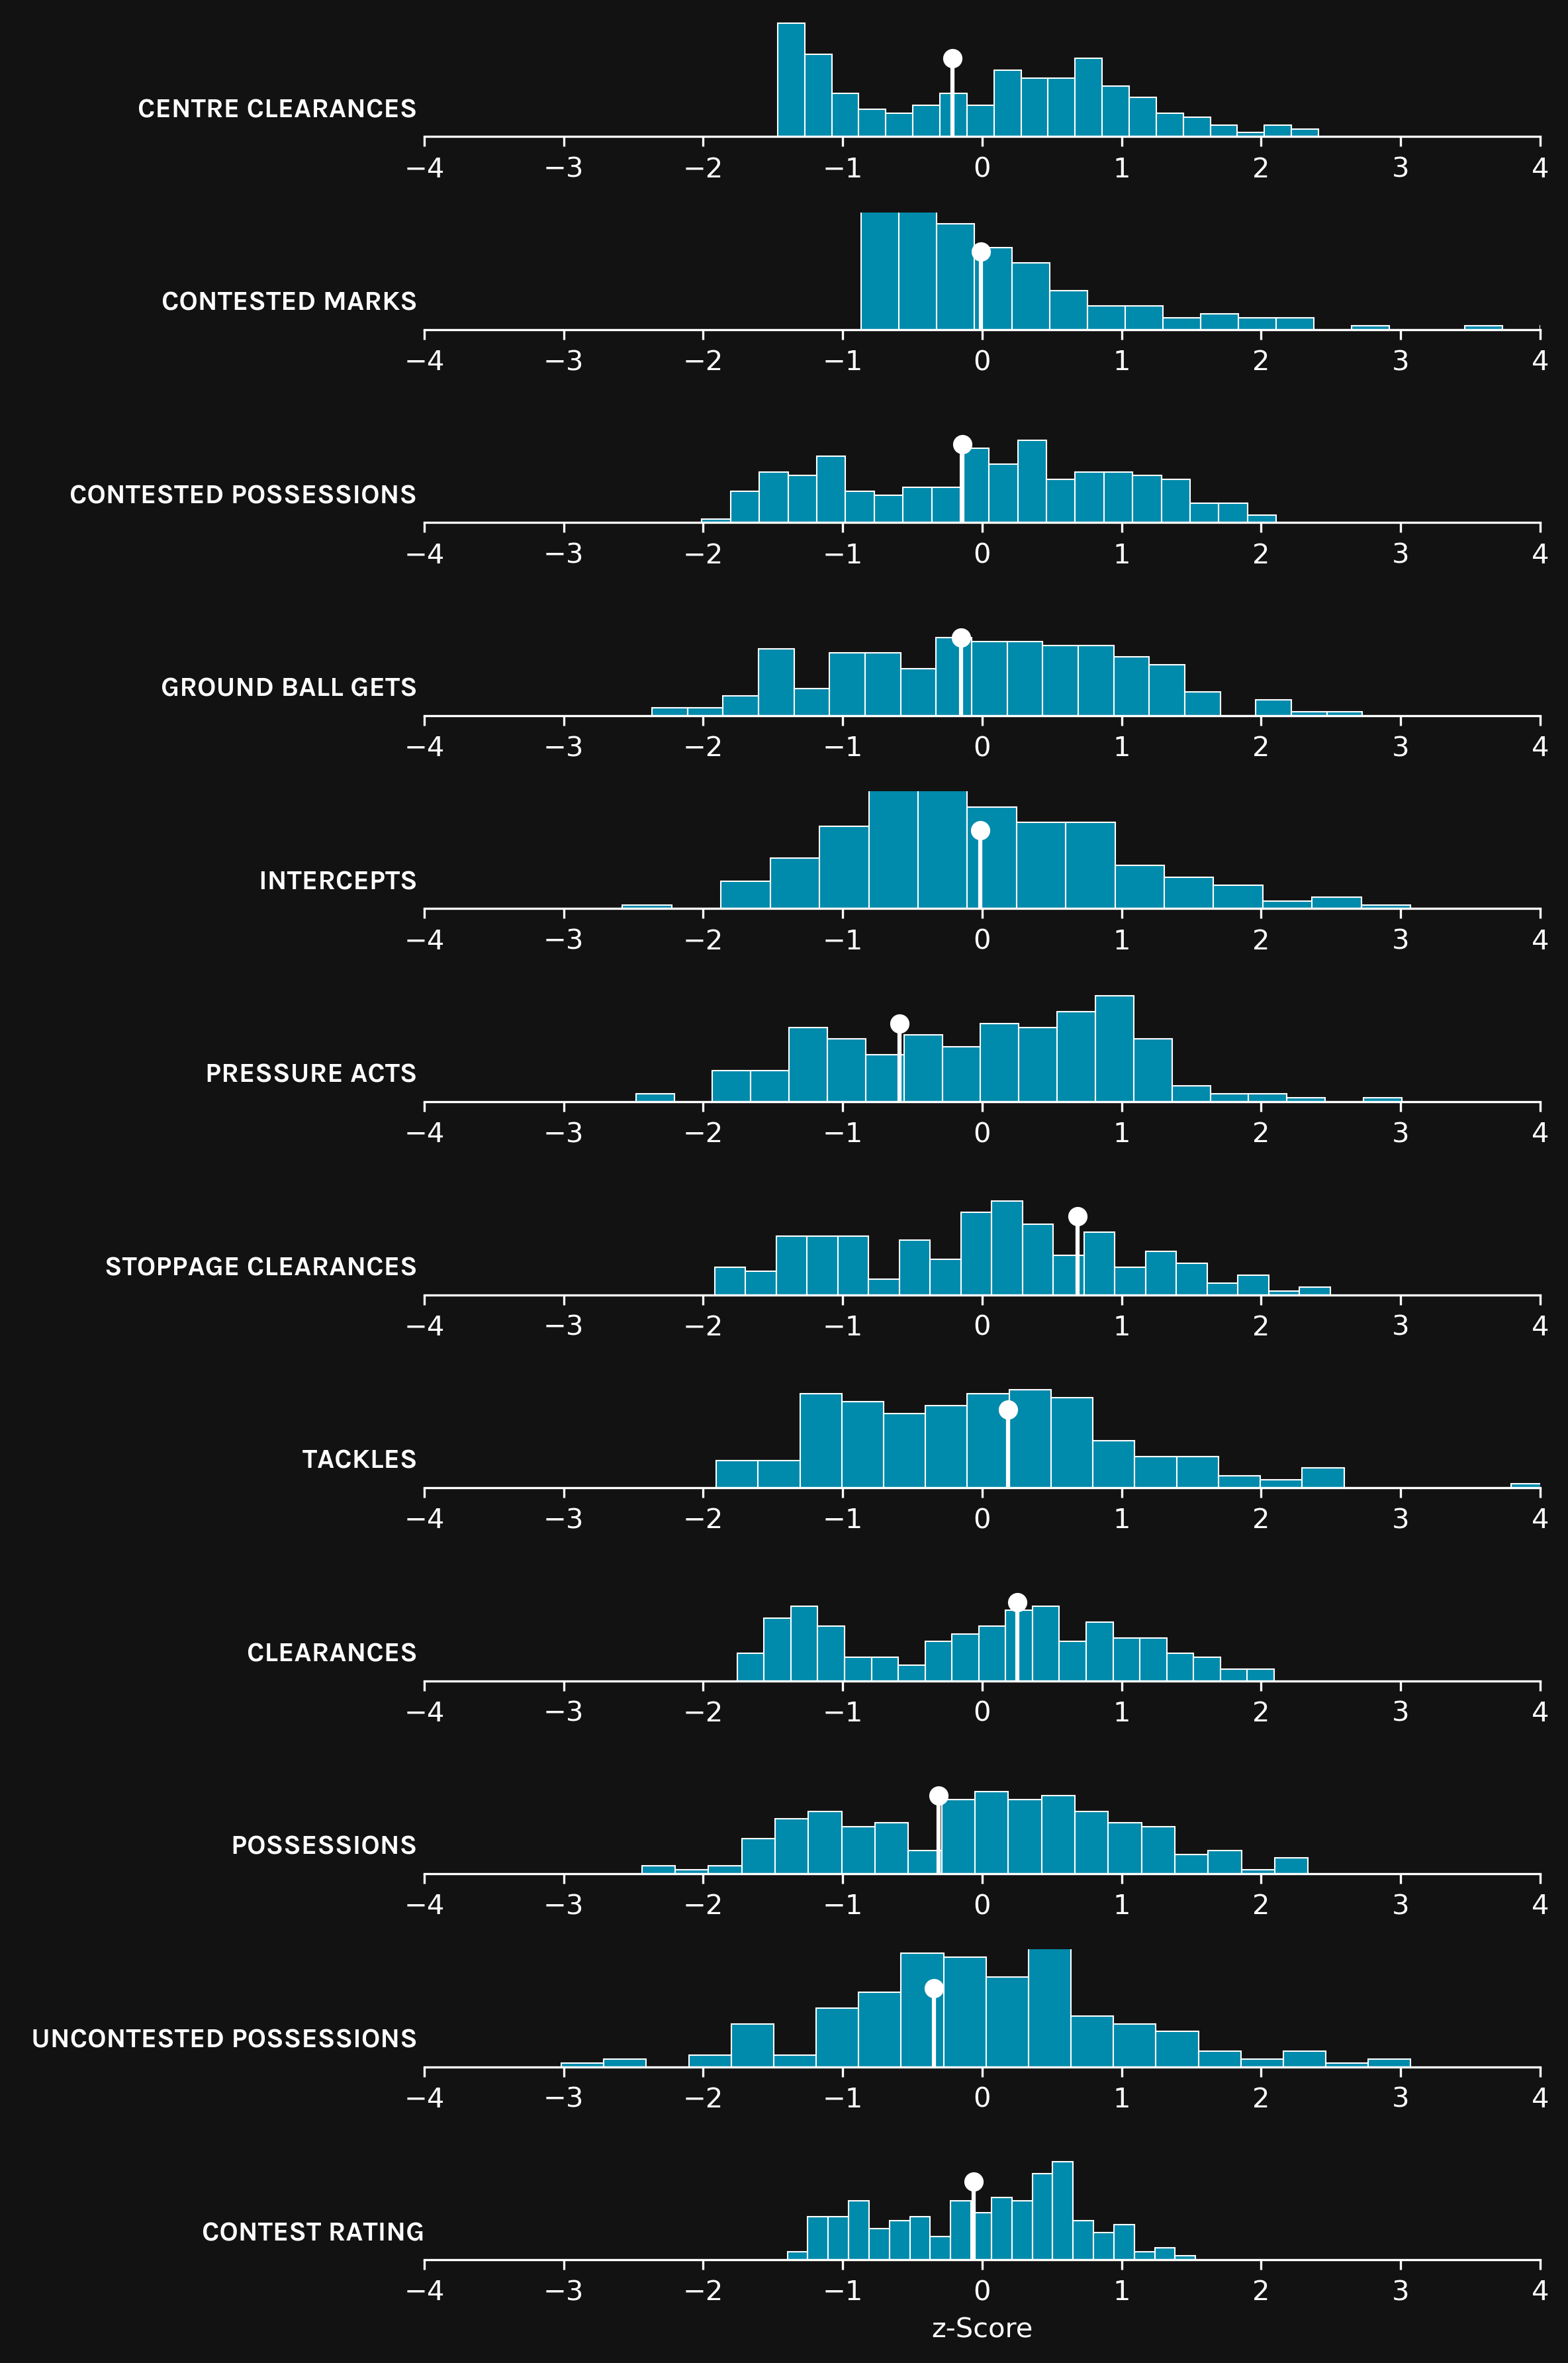

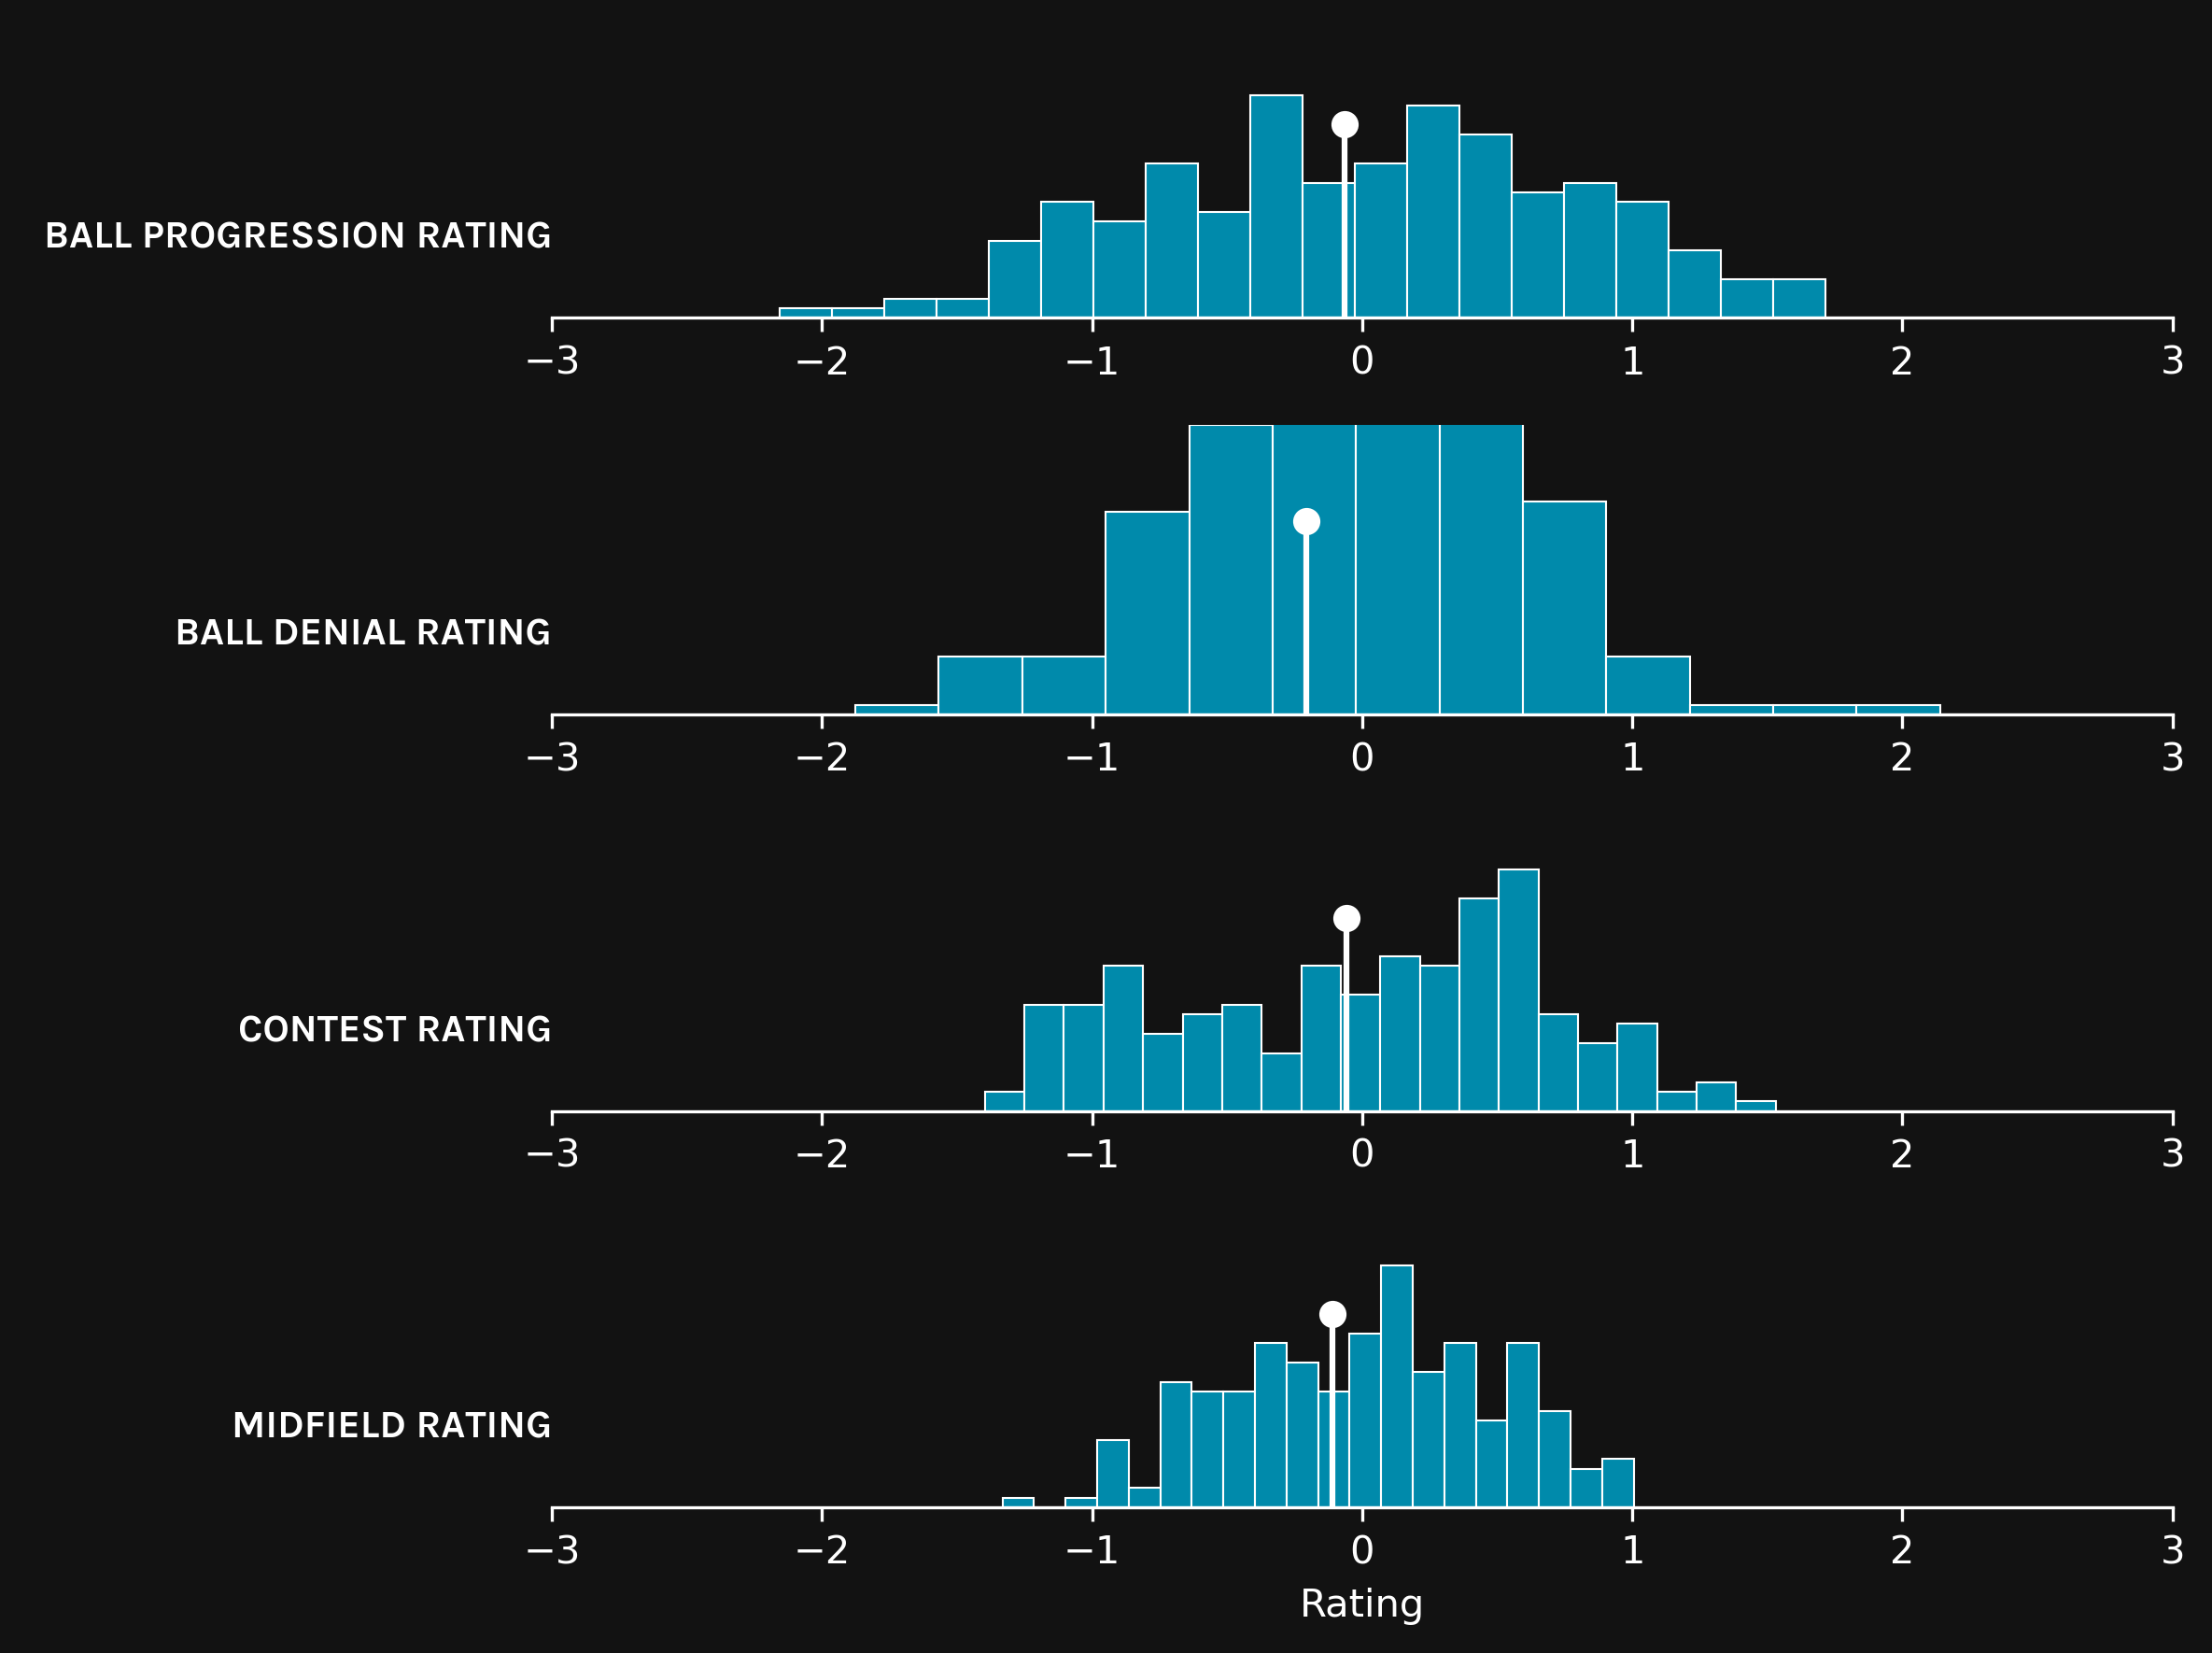

In [14]:
player = "Zak Butters"
team = "Port Adelaide"
season = 2022

for role in position_role_stats_zscaled.keys():
    stats = position_role_stats_zscaled[role] + [role+'_rating']
    fig, ax = player_stats_histograms(position_summary, player, team, season, stats)
    
stats = [x+"_rating" for x in list(position_role_stats_zscaled.keys())] + [selected_position_rating]
fig, ax = player_stats_histograms(position_summary, player, team, season, stats, figsize=(8, 6), xlim=3, xlabel = "Rating")
    